In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv("eval_ckpt450.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,-0.000005,-0.000026,0.079557,0.670223,-1.013754,0.381751,1.972147,-0.000868,-0.005033,...,-0.000428,-0.012230,0.001598,-0.021629,0.920534,-0.390662,0.313021,0.949746,-0.600152,0.799886
1,1,-0.000017,-0.000103,0.078269,0.673244,-1.017906,0.384610,1.959847,-0.001609,-0.009946,...,-0.000817,-0.024259,0.003197,-0.042902,0.925269,-0.379310,0.313021,0.949746,-0.596468,0.802637
2,2,-0.000014,-0.000083,0.075739,0.672467,-1.016845,0.383874,1.962989,0.002070,0.012704,...,0.001047,0.030973,-0.004078,0.054776,0.924073,-0.382216,0.313021,0.949746,-0.597411,0.801935
3,3,0.000016,0.000088,0.071815,0.665796,-1.007538,0.377568,1.990506,0.003940,0.021091,...,0.001878,0.051011,-0.006589,0.090208,0.913207,-0.407495,0.313021,0.949746,-0.605634,0.795744
4,4,0.000045,0.000234,0.066980,0.660306,-0.999602,0.372396,2.013902,0.001825,0.008765,...,0.000831,0.021050,-0.002670,0.037225,0.903424,-0.428747,0.313021,0.949746,-0.612573,0.790414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,6.086278,4.196042,0.066212,-0.953363,0.879811,-2.255626,115.536171,-0.231065,0.003484,...,0.060663,0.112069,-0.137475,-0.006673,0.646324,-0.763063,-0.411797,-0.911276,-0.578588,0.815620
3996,3996,6.083677,4.195929,0.065365,-0.924120,0.853345,-2.294510,115.556168,-0.287276,-0.025960,...,0.071852,0.148105,-0.139809,0.107458,0.630937,-0.775834,-0.411797,-0.911276,-0.623004,0.782219
3997,3997,6.080590,4.195548,0.064345,-0.891016,0.820120,-2.336094,115.612389,-0.328696,-0.048833,...,0.083471,0.174776,-0.141653,0.188945,0.586345,-0.810061,-0.411797,-0.911276,-0.671756,0.740772
3998,3998,6.077336,4.195089,0.063136,-0.859402,0.783332,-2.376209,115.680092,-0.322663,-0.043206,...,0.091176,0.171710,-0.148718,0.172823,0.530200,-0.847873,-0.411797,-0.911276,-0.720178,0.693789


(4000, 45)

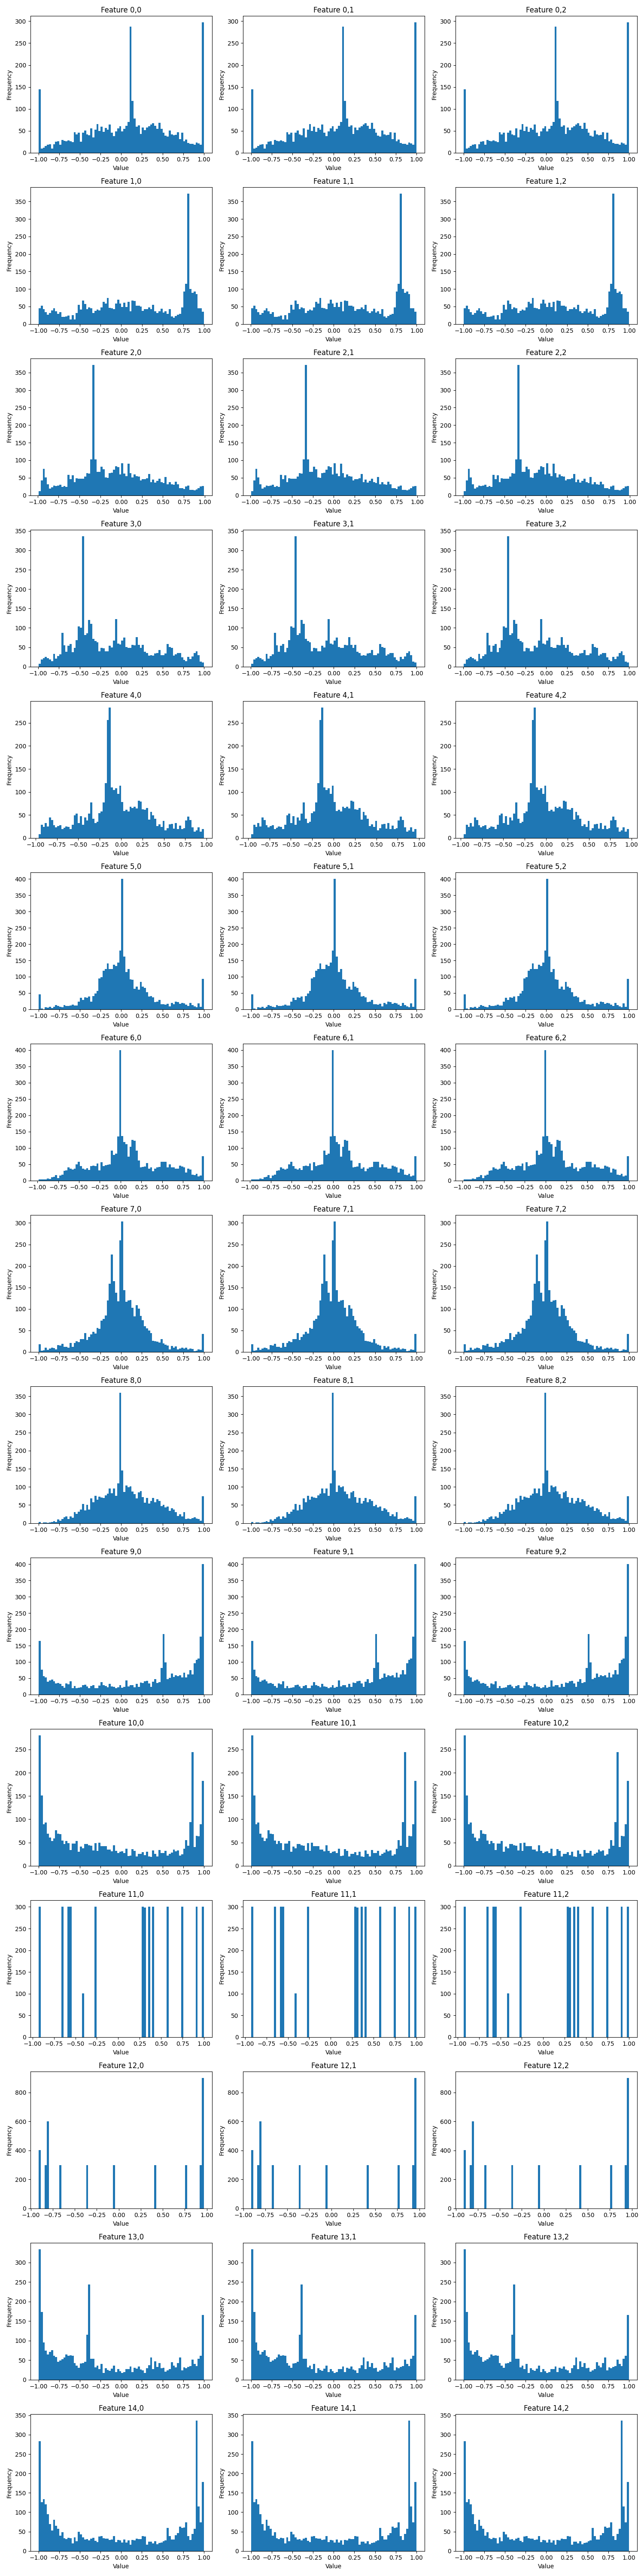

In [36]:
import matplotlib.pyplot as plt

num_features = obs_array.shape[1]
num_rows = (num_features + 2) // 3  # Calculate rows needed, rounding up
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i in range(num_features):
    ax = axes[i]
    ax.hist(obs_array[:,i], bins=80)
    ax.set_title(f'Feature {i//3},{i%3}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1654820/2860263712.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


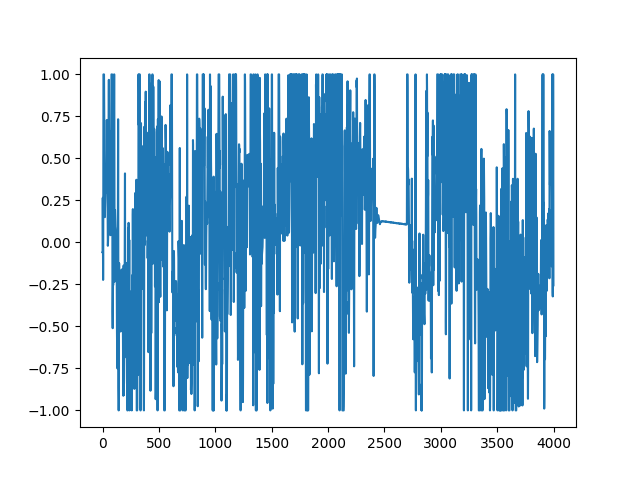

In [37]:
%matplotlib widget
plt.figure()
plt.plot(obs_array[:,0])

Text(0.5, 0, 'Time (s)')

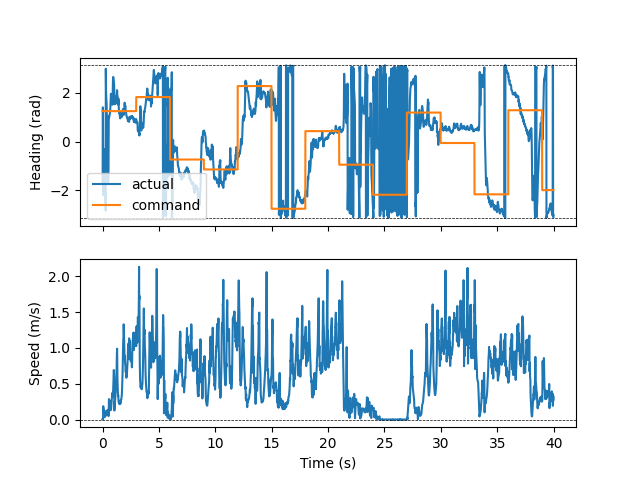

In [38]:
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)
# heading

des_heading = np.arctan2(df['obs12'], df['obs11'])
fig, axs = plt.subplots(2,1, sharex=True)
axs[0].plot(np.arange(len(df))*0.01, heading, label='actual')
axs[0].plot(np.arange(len(df))*0.01, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*0.01, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')
axs[1].set_xlabel('Time (s)')



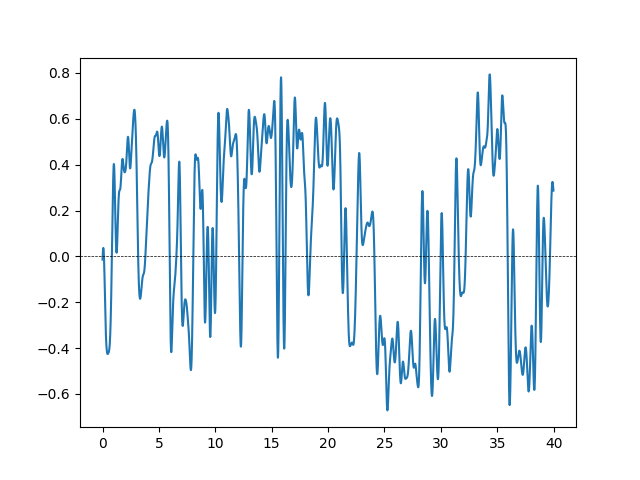

In [33]:
plt.figure()
from scipy.signal import butter, filtfilt

# Design Butterworth low-pass filter
nyquist = 1/(2*0.01)  # Nyquist frequency
cutoff = 2  # Hz
order = 3
b, a = butter(order, cutoff/nyquist, btype='low')

# Apply filter
action_filtered = filtfilt(b, a, df['action'])

plt.plot(np.arange(len(df))*0.01, action_filtered)
plt.axhline(0, color='k', linestyle='dashed', linewidth=0.5)